Author : Himanshu Gullaiya <br>
Source : Pierian Data

# Object Detection
---------------------------

## 1. Template Matching

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [19]:
dog = cv2.imread('../DATA/sammy.jpg')
dog_face = cv2.imread('../DATA/sammy_face.jpg')

In [20]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [9]:
plt.imshow(dog)

In [ ]:
height, width, channels = dog_face.shape
for m in methods:
    dog_copy = dog.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(dog_copy, dog_face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # min max value from heatmap
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = top_left[0]+width,top_left[1]+height
    cv2.rectangle(dog_copy, top_left, bottom_right, 255,10)
   
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(dog_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    plt.show()

-------

## 2. Corner Detection
> Harris <br>
> Shi-Tomasi

In [ ]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

In [ ]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

In [ ]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

In [ ]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

#### a) Harris Corner Detection Algorithm
----------
**cv2.cornerHarris** Function

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.


In [70]:
gray = np.float32(gray_flat_chess) # haris algo requires float values

In [71]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)  #ksize = kernel size of sobel operator, k = hariss operator

In [72]:
dst = cv2.dilate(dst,None)

In [ ]:
plt.imshow(dst)

In [76]:
flat_chess[dst > 0.01*dst.max()] = [255,0,0]

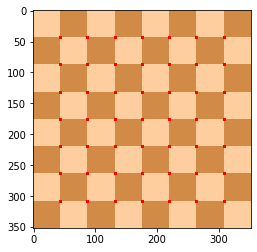

In [77]:
plt.imshow(flat_chess)

In [82]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)

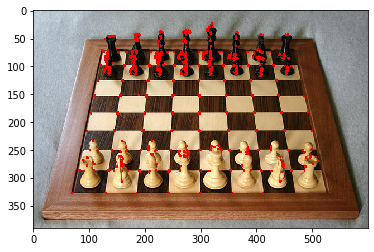

In [83]:
real_chess[dst > 0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

#### b) Shi-Tomasi Corner Detector & Good Features to Track Paper
---------

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.


In [102]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [104]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 60, 0.01, 10)         

In [105]:
corners = np.int0(corners)

In [106]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0), -1)

In [ ]:
plt.imshow(flat_chess)

In [108]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [121]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)

In [122]:
corners = np.int0(corners)

In [ ]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)
plt.imshow(real_chess)

----

## 3. Edge Detection

#### Canny Edge Detector
https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

The Canny edge detection algorithm is composed of 5 steps:
> 1. Noise reduction : Gaussian Blur Filter
> 2. Gradient calculation;
> 3. Non-maximum suppression;
> 4. Double threshold;
> 5. Edge Tracking by Hysteresis.

In [151]:
img = cv2.imread('../DATA/sammy_face.jpg')

In [152]:
# blurred = cv2.GaussianBlur(img, (3,3), 10)
blurred = cv2.blur(img, ksize = (5,5))

In [153]:
med_val = np.median(img)

lower = int(max(0,0.7*med_val))
upper = int(min(255,1.3*med_val))

In [ ]:
edges = cv2.Canny(image=img, threshold1 = lower, threshold2 = upper)

In [162]:
edges = cv2.Canny(image=blurred, threshold1 = lower, threshold2 = upper+50)

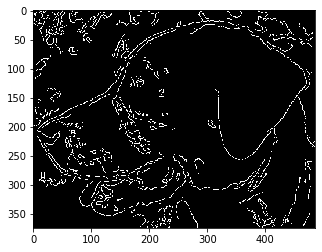

In [163]:
plt.imshow(edges, cmap = 'gray')

---------------------------------

## 4. Grid Detection

In [164]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')

In [165]:
found,corners = cv2.findChessboardCorners(flat_chess, (7,7)) # (7,7) is no of blocks

In [ ]:
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)

In [ ]:
plt.imshow(flat_chess)

### Circle Based Grids

In [177]:
dots = cv2.imread('../DATA/dot_grid.png')

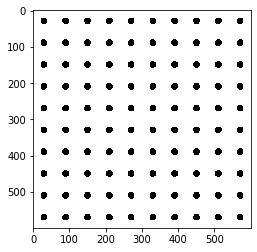

In [169]:
plt.imshow(dots)

In [178]:
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [179]:
found

True

In [ ]:
cv2.drawChessboardCorners(dots, (10,10), corners, found)

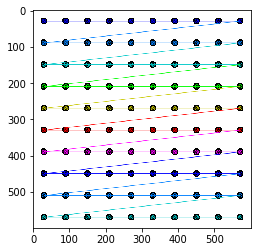

In [181]:
plt.imshow(dots)

Mainly used for camera calibration. Two functions: <br>
cv2.findChessboardCorners() <br>
cv2.findCirclesGrid()

-------------------

## 4. Contour Detection

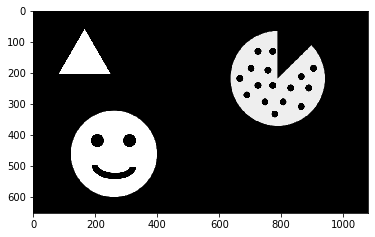

In [195]:
img = cv2.imread('../DATA/internal_external.png',0)
plt.imshow(img, cmap = "gray")

In [196]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [197]:
type(contours)

list

In [198]:
len(contours)

22

In [ ]:
contours

In [200]:
type(hierarchy)

numpy.ndarray

In [201]:
hierarchy = hierarchy.reshape(-1,4)

In [ ]:
hierarchy

In [203]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

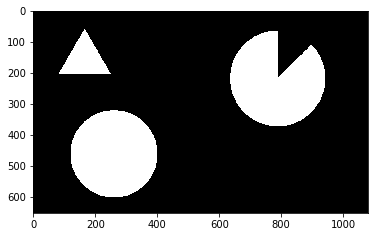

In [204]:
plt.imshow(external_contours,cmap='gray')

In [205]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

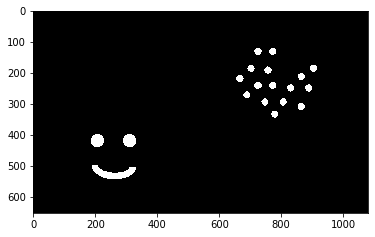

In [206]:
plt.imshow(image_internal,cmap='gray')

#### Gradient

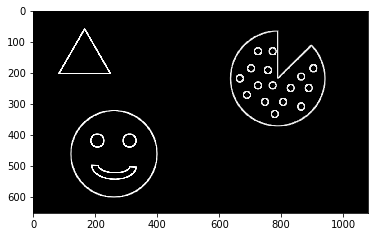

In [207]:
kernel = np.ones((5,5), dtype = np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap = 'gray')

## 4. Feature Matching
1. Brute-Force Matchiing with ORB desciptors
2. Brute-Force Matching with SIFT descriptors & Ratio TEst
3. FLANN based Matched